### Decision trees
Desicion trees is a classification algorithm, and as the name suggests, uses a tree based model to classify instances. Each node (except leaf level nodes) will filter out instances based on a condition. At leaf nodes, the instances will be assigned with a class label.

In [1]:
#Execute the following two lines if you wish to turn off all warnings.
#import warnings
#warnings.filterwarnings("ignore")

#### Read data
In this demo, we are going to work on credit_risk dataset, where based on the different parameters, a customer is going to be marked with the class label - good / bad

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading data from input csv file
credit_data = pd.read_csv("../ClassificationDataSet/credit_risk.csv")

In [4]:
# Viewing sample data
credit_data.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


#### Feature Engineering
Let us now look at the data to get insights on it, which will help us build a good model.

In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

#### Selecting features
Consider all the columns except class as features. 
Class is considered as the target

In [6]:
# Selecting the predictor attributes
X = credit_data.columns.drop("class")

# Selecting  the target
y = credit_data['class']

#### Encoding the categorical variables

In [7]:
# Encoding all the predictor variables using the get_dummies method() to convert the categorical values to numerical values.
credit_data_encoded = pd.get_dummies(credit_data[X])

# Uncomment the next line to see the list of all column names
#credit_data_encoded.columns

print("Total number of predictors after encoding = ", len(credit_data_encoded.columns))

Total number of predictors after encoding =  61


#### Splitting the data into train and test set in a ratio of 85:15

In [8]:
# Import the required function
from sklearn.model_selection import train_test_split

#splitting data into train and test datasets
X_train,X_test,y_train,y_test = train_test_split(credit_data_encoded, y,test_size=0.15,random_state=100) 

# Printing the shape of the resulting datasets
print("Shape of X_train and y_train are:", X_train.shape, "and", y_train.shape, " respectively")
print("Shape of X_test and y_test are:", X_test.shape, "and", y_test.shape, " respectively")

Shape of X_train and y_train are: (850, 61) and (850,)  respectively
Shape of X_test and y_test are: (150, 61) and (150,)  respectively


#### Building a decision tree model

In [9]:
# Importing required class 
from sklearn.tree import DecisionTreeClassifier

# Creating an object of the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state = 1)

# Training model on the training data
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [10]:
#predicting targets based on the model built
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#### Visualize the tree

In [11]:
from sklearn.tree import export_graphviz

In [12]:
# Ensure that the python-graphviz package is installed.
import graphviz 

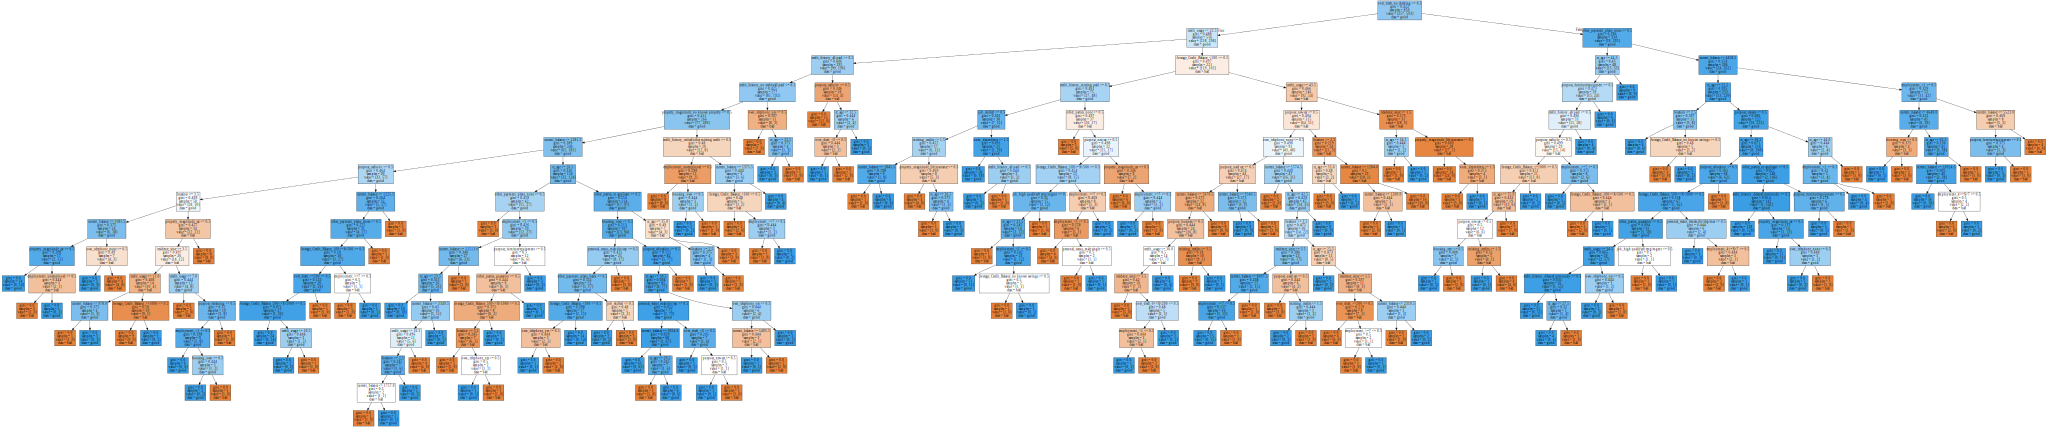

In [13]:
dot_data = export_graphviz(model, out_file=None,
                          feature_names=credit_data_encoded.columns,  
                          class_names=model.classes_,  
                          filled=True) 
graph = graphviz.Source(dot_data) 
graph
# A large tree is plotted. 
# You can effectiviely visualize a smaller one by reducing features 
# or reducing the complexity of the tree (will be explained later)

#### Evaluate model performance on train and test data

In [14]:
# Getting the accuracy on train data
train_accuracy = model.score(X_train,y_train)
print("Accuracy of the model on train data = ",train_accuracy)

# Getting the accuracy on test data
test_accuracy = model.score(X_test,y_test)
print("Accuracy of the model on test data = ",test_accuracy)

Accuracy of the model on train data =  1.0
Accuracy of the model on test data =  0.6533333333333333


#### Tuning the hyper-parameters

Here you can observe that the tree looks like an overfit model. It has a 100% accuracy in train and just 67% in test. 
To avoid this problem, we need to tune certain parameters of the tree algorithm called hyper parameters

min_samples_split - number of data instances required in a node to proceed with further splitting of node.

min_impurity_decrease - at every level of the decision tree, the data instances gets concentrated towards one of the
class labels. This corresponds to the decrease in impurity of dataset in the node. so when min_impurity_decrease is specified, 
nodes will be further split only when impurity decreases by the specified value.

In [15]:
# Model 1:
# Min number of samples required in a set to split = 10
# Min reduction in impurity required for split to be included in the tree = 0.005

model1 = DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)

# Fitting the model to the training data
model1.fit(X_train,y_train)

# Measuring the accuracy of the model
print("Model1 train accuracy = ", model1.score(X_train,y_train))
print("Model1 test accuracy = ", model1.score(X_test,y_test))


Model1 train accuracy =  0.7635294117647059
Model1 test accuracy =  0.7266666666666667


In [16]:
# Model 2:
# Min number of samples required in a set to split = 20
# Min reduction in impurity required for split to be included in the tree = 0.1

model2 = DecisionTreeClassifier(min_samples_split=20,min_impurity_decrease=0.1)

# Fitting the model to the training data
model2.fit(X_train,y_train)

# Measuring the accuracy of the model
print("Model2 train accuracy = ", model2.score(X_train,y_train))
print("Model2 test accuracy = ", model2.score(X_test,y_test))

Model2 train accuracy =  0.6976470588235294
Model2 test accuracy =  0.7133333333333334


#### Confusion Matrix
Confusion matrix helps to assess how good the model works on individual classes in the outcome

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
#confusion matrix compares the actual target values and the predicted target values
train_conf_matrix = confusion_matrix(y_train,train_predictions)
test_conf_matrix = confusion_matrix(y_test,test_predictions)

In [19]:
#confusion matrix on the train data
pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)

,bad,good
bad,257,0
good,0,593


In [20]:
#confusion matrix on the test data
pd.DataFrame(test_conf_matrix,columns=model.classes_,index=model.classes_)

,bad,good
bad,15,28
good,24,83


$
\begin{align}
Accuracy = \frac{No. of correct predictions}{No. of predictions made}
\end{align}
$

In [21]:
#train accuracy calculated from confusion matrix
train_correct_predictions = train_conf_matrix[0][0]+train_conf_matrix[1][1]
train_total_predictions = train_conf_matrix.sum()
train_accuracy = train_correct_predictions/train_total_predictions
print(train_accuracy)

1.0


In [22]:
#test accuracy calculated from confusion matrix
test_correct_predictions = test_conf_matrix[0][0]+test_conf_matrix[1][1]
total_predictions = test_conf_matrix.sum()
test_accuracy = test_correct_predictions/total_predictions
print(test_accuracy)

0.6533333333333333


#### Classification report
* precision for class 'A' = (number of outcomes correctly predicted as class 'A' by the model) /  (total number of instances predicted as class 'A' by the model)
* recall for class 'A' = (number of outcomes correctly predicted as class 'A' by the model) /  (total number of class 'A' instances present in the dataset)
* f1-score for class 'A'- harmonic mean of precision and recall for class 'A'
* support for class 'A'- number of instances classified as class 'A'

In [23]:
from sklearn.metrics import classification_report

In [24]:
# report based on tain data
print(classification_report(y_train,train_predictions))

              precision    recall  f1-score   support

         bad       1.00      1.00      1.00       257
        good       1.00      1.00      1.00       593

    accuracy                           1.00       850
   macro avg       1.00      1.00      1.00       850
weighted avg       1.00      1.00      1.00       850



In [25]:
# report based on tain data
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

         bad       0.38      0.35      0.37        43
        good       0.75      0.78      0.76       107

    accuracy                           0.65       150
   macro avg       0.57      0.56      0.56       150
weighted avg       0.64      0.65      0.65       150

